making installations

In [1]:
#cloning the master branch of the Tensorflow Models repository
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57460, done.
remote: Counting objects: 100% (1523/1523), done.
remote: Compressing objects: 100% (597/597), done.
remote: Total 57460 (delta 1041), reused 1360 (delta 910), pack-reused 55937
Receiving objects: 100% (57460/57460), 572.95 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (39704/39704), done.


In [2]:
#compiling the protos
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [3]:
#install the tensorflow API
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 10.2MB/s 
     |████████████████████████████████| 358kB 52.7MB/s 
     |████████████████████████████████| 1.6MB 49.3MB/s 
     |████████████████████████████████| 153kB 55.9MB/s 
     |████████████████████████████████| 2.3MB 44.9MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 829kB 46.8MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 38.2MB 61kB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 1.2MB 40.7MB/s 
     |████████████████████████████████| 174kB 50.0MB/s 
     |████████████████████████████████| 645kB 45.5MB/s 
     |████████████████████████████████| 686kB 49.5MB/s 
     |████████████████████████████████| 102kB 13.4MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650082 sha256=f1b4ac0cf35862076a575841e

In [4]:
#cloning the repository for access to processed data
%cd /content
!git clone https://github.com/HAA21/football-logo-detector.git

/content
Cloning into 'football-logo-detector'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 43 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [5]:
#defining paths to training data, testng data, and label map
train_record_path = '/content/football-logo-detector/train.record'
test_record_path = '/content/football-logo-detector/test.record'
labelmap_path = '/content/football-logo-detector/labelmap.pbtxt'

configuration for training

In [6]:
#setting hyperparameters
batch_size = 16
num_steps = 1000
num_eval_steps = 100

In [7]:
#downloading EfficientDet model to colab from tensorflow object detection model zoo
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

--2021-05-27 11:22:48--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  96.8MB/s    in 0.3s    

2021-05-27 11:22:49 (96.8 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [8]:
#path to the model checkpoint 
fine_tune_checkpoint = 'efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0'

In [9]:
#downloading the base configuration of the model to colab
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
base_config_path = 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config'

--2021-05-27 11:22:50--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2021-05-27 11:22:50 (41.3 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’ saved [4630/4630]



In [10]:
#changing the base configuration of the model to point to our custom data
import re

with open(base_config_path) as f:
    config = f.read()

with open('model_config.config', 'w') as f:

  #setting new labelmap path
  config = re.sub('label_map_path: ".*?"', 
             'label_map_path: "{}"'.format(labelmap_path), config)
  
  #setting fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)
  
  #setting train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 
                  'input_path: "{}"'.format(train_record_path), config)
  
  #setting test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 
                  'input_path: "{}"'.format(test_record_path), config)
  
  #setting number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(4), config)
  
  #setting batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)
  
  #setting training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)
  
  #setting fine-tune checkpoint type to detection
  config = re.sub('fine_tune_checkpoint_type: "classification"', 
             'fine_tune_checkpoint_type: "{}"'.format('detection'), config)
  
  f.write(config)

In [11]:
model_dir = 'training/'                                                         #log directory that your training process will create
pipeline_config_path = 'model_config.config'                                    #path to our pipeline config file

training

In [12]:
#training the model with all specifications
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2021-05-27 11:22:58.338201: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-27 11:23:00.660528: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-27 11:23:00.724489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-27 11:23:00.725062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-27 11:23:00.725104: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-27 11:23:00.849952: I tensorflow/stream_executor/platform/default

In [13]:
#exporting the training output into a savedmodel format for inference
output_directory = 'inference_graph'

!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

2021-05-27 11:47:30.746347: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-27 11:47:33.232172: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-27 11:47:33.267250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-27 11:47:33.267843: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-27 11:47:33.267888: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-27 11:47:33.272741: I tensorflow/stream_executor/platform/default

In [14]:
#downloading the saved model
from google.colab import files
files.download(f'/content/{output_directory}/saved_model/saved_model.pb') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

testing

In [15]:
#importing dependencies
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [16]:
#puts image into numpy array to feed into tensorflow graph
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size

  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [17]:
#to access the label map to map inference or prediction to label
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [18]:
#loading the saved model
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/{output_directory}/saved_model')

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)                                           #converts image into tensor
  input_tensor = input_tensor[tf.newaxis,...]                                          #converts the image into batch format

  model_fn = model.signatures['serving_default']                                       #running the inference
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))                              #accessing the tensor with prediction
  output_dict = {key:value[0, :num_detections].numpy()                                 #converting tensor into numpy array and taking the 0th index
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64) #converting detected classes to int
   
  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(             #reframing the the bbox mask to the image size
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

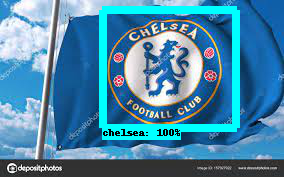

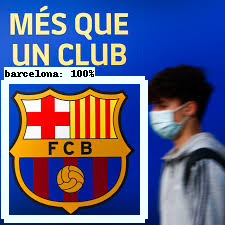

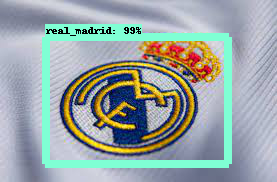

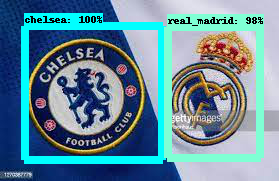

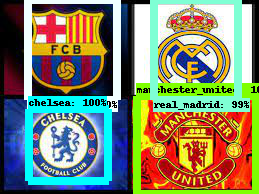

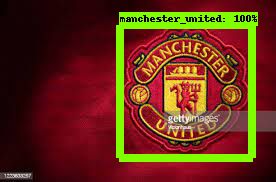

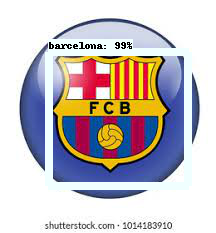

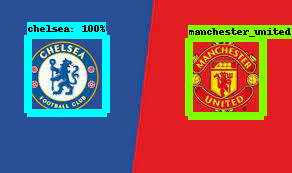

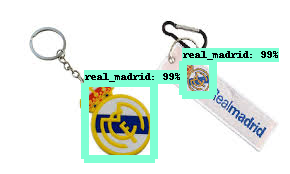

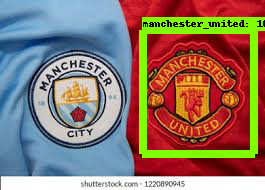

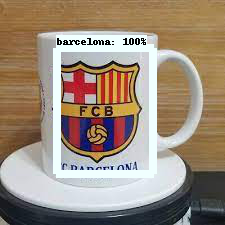

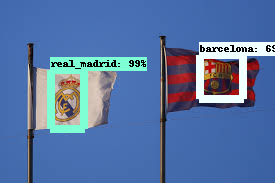

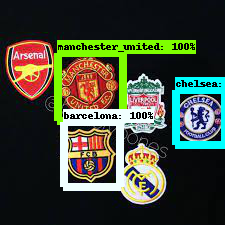

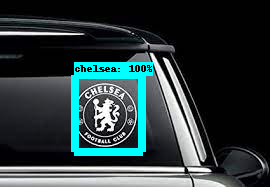

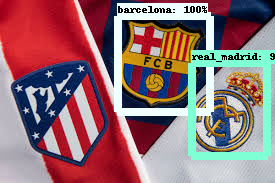

In [59]:
#running inference on all images in the given path, and displaying bounding boxes
for image_path in glob.glob('/content/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))